<a href="https://colab.research.google.com/github/sgoggins/MU-Software-Engineering/blob/master/Master_Method_Goggins.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Step 1: Introduction to the Recurrence

 - Narration: “In computer science, we often encounter recursive algorithms whose time complexity can be expressed as a recurrence relation. The Master Theorem provides an efficient way to solve these recurrences.”
 - Visual: Show a recursive algorithm, such as Merge Sort, with its recurrence:
T(n) = aT(n/b) + O(n^d)
 - Visual Explanation: The recurrence expresses that a problem of size n is divided into a subproblems of size n/b, with a cost of O(n^d) for combining solutions.

Step 2: Introduce the Master Theorem Formula

 - Narration: “The Master Theorem is applied to recurrences of the form T(n) = aT(n/b) + O(n^d). Depending on the values of a, b, and d, the solution fits into one of three cases.”
 - Visual: Display the formula with placeholders a, b, and d. Show how the variables relate to the recurrence.

Step 3: Break Down the Three Cases

 - Case 1: If  a > b^d
 - Narration: “If the work done by the recursive calls dominates, we get the solution T(n) = O(n^log_b(a)).”
 - Visual: Show the comparison between  a  and  b^d . Explain the logic behind why the recursive part dominates.
 - Case 2: If  a = b^d
 - Narration: “If the work done outside the recursion and inside are balanced, we get T(n) = O(n^d \log n).”
 - Visual: Explain that both parts contribute equally, so we add a logarithmic factor to the overall time complexity.
 - Case 3: If  a < b^d
 - Narration: “If the work done outside the recursive calls dominates, we get T(n) = O(n^d).”
 - Visual: Show how the outside work grows faster, resulting in the dominance of the O(n^d) term.

Step 4: Provide Examples

 - Narration: “Let’s see how the Master Theorem applies to common algorithms.”
 - Visual: Show the recurrence of Merge Sort:
 T(n) = 2T(n/2) + O(n)
 - Explain that this fits Case 2, resulting in O(n log n).
 - Example 2: Quick Sort Recurrence
 T(n) = 2T(n/2) + O(n^2)
 - Explain why this falls under Case 3.

Step 5: Summarize

 - Narration: “The Master Theorem gives us a simple way to find the time complexity of recursive algorithms by fitting them into one of three cases, based on how the work is divided.”
 - Visual: Show the formula again, emphasizing the importance of identifying a, b, and d correctly.

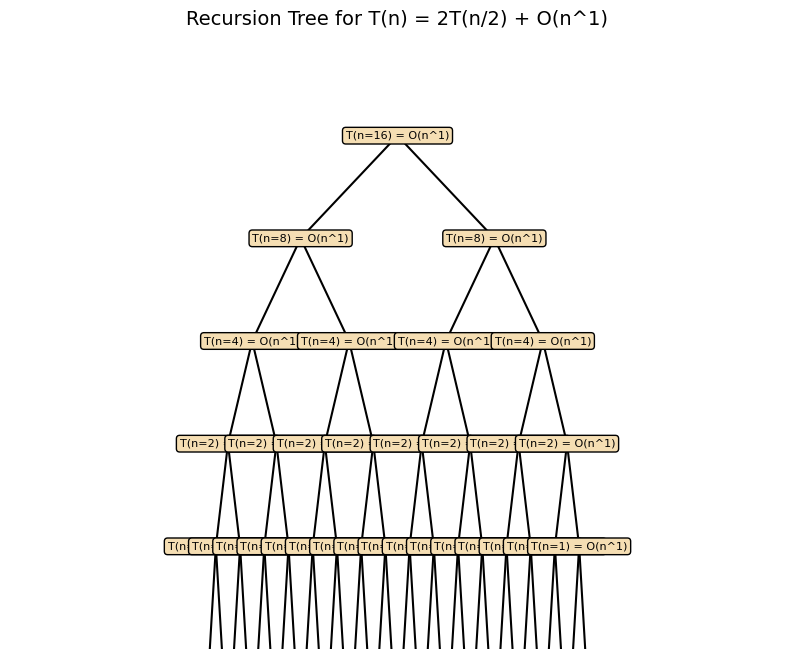

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Recursive function to simulate the cost at each level of recursion
def recursion_tree(ax, n, a, b, d, level, max_levels, x, width):
    if level > max_levels:
        return

    # Calculate the cost for this level
    current_cost = n**d
    ax.text(x, -level, f'T(n={int(n)}) = O(n^{d})', ha='center', va='center', fontsize=8, bbox=dict(boxstyle='round', facecolor='wheat', edgecolor='black'))

    # Calculate the position for the next level
    child_width = width / a
    for i in range(a):
        new_x = x + (i - (a - 1) / 2) * child_width
        new_n = n / b

        # Draw lines from the current node to the child nodes
        ax.plot([x, new_x], [-level, -(level + 1)], color='black')

        # Recursively draw the subtree
        recursion_tree(ax, new_n, a, b, d, level + 1, max_levels, new_x, child_width)

# Parameters for the recurrence relation
n = 16  # Initial problem size
a = 2   # Number of subproblems
b = 2   # Size reduction factor
d = 1   # Cost of combining solutions
max_levels = 4  # Maximum depth of recursion tree

# Setup plot
fig, ax = plt.subplots(figsize=(10, 8))
ax.set_xlim(-10, 10)
ax.set_ylim(-max_levels - 1, 1)
ax.axis('off')

# Start recursion tree visualization
recursion_tree(ax, n, a, b, d, 0, max_levels, 0, 10)

# Title and show plot
plt.title(f'Recursion Tree for T(n) = {a}T(n/{b}) + O(n^{d})', fontsize=14)
plt.show()

In [12]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource, LabelSet, Label
from bokeh.io import curdoc

# Enable Bokeh output within Jupyter Notebook
output_notebook()

# Recursive function to generate the recursion tree data
def recursion_tree_data(n, a, b, d, level, max_levels, x, width):
    if level > max_levels:
        return [], [], []

    # Calculate the cost for this level
    current_cost = f"T(n={int(n)}) = O(n^{d})"

    # Record the current node
    nodes = [(x, -level, current_cost)]

    # Calculate the position for the next level
    child_width = width / a
    edges = []

    for i in range(a):
        new_x = x + (i - (a - 1) / 2) * child_width
        new_n = n / b
        edges.append((x, new_x, -level, -(level + 1)))

        # Recursively get data for child nodes
        child_nodes, child_edges, _ = recursion_tree_data(new_n, a, b, d, level + 1, max_levels, new_x, child_width)
        nodes += child_nodes
        edges += child_edges

    return nodes, edges, current_cost

# Parameters for the recurrence relation
n = 16  # Initial problem size
a = 2   # Number of subproblems
b = 2   # Size reduction factor
d = 1   # Cost of combining solutions
max_levels = 4  # Maximum depth of recursion tree

# Generate tree data
nodes, edges, current_cost = recursion_tree_data(n, a, b, d, 0, max_levels, 0, 10)

# Prepare data for Bokeh plot
x_coords, y_coords, labels = zip(*nodes)
source = ColumnDataSource(data=dict(x=x_coords, y=y_coords, label=labels))

# Set up the plot with corrected width and height attributes
plot = figure(title=f"Recursion Tree for T(n) = {a}T(n/{b}) + O(n^{d})",
              x_range=(-10, 10), y_range=(-max_levels - 1, 1),
              width=1600, height=600, tools="")

# Draw the nodes using scatter (since circle is deprecated for size attribute)
plot.scatter(x='x', y='y', size=10, color="blue", source=source)

# Draw the edges between nodes
for edge in edges:
    plot.line([edge[0], edge[1]], [edge[2], edge[3]], line_width=2)

# Add labels for each node
labels = LabelSet(x='x', y='y', text='label', level='glyph', x_offset=5, y_offset=5, source=source)
plot.add_layout(labels)

# Add a label for the formula T(n) = aT(n/b) + O(n^d)
formula_text = f"T(n) = {a}T(n/{b}) + O(n^{d})"
formula_label = Label(x=-9, y=1, text=formula_text, text_font_size="15px", text_color="black")
plot.add_layout(formula_label)

# Show the plot in the notebook
show(plot)

In [33]:
import random
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource, LabelSet, Arrow, NormalHead
from bokeh.layouts import column

# Enable Bokeh output within Jupyter Notebook
output_notebook()

# Recursive function to generate the recursion tree data
def recursion_tree_data(n, a, b, d, level, max_levels, x, width, spread_factor, show_labels_at_levels):
    if level > max_levels:
        return [], [], []

    # Determine whether to show label at this level based on user-specified levels
    show_label = level in show_labels_at_levels

    # Calculate the cost for this level
    current_cost = f"T(n={int(n)}) = {a}T(n/{b}) + O(n^{d})" if show_label else ""

    # Add jitter to improve spacing
    label_x_jitter = x + random.uniform(-5, 5)
    label_y_jitter = -level * 3 + random.uniform(-1, 1)

    # Record the node and label positions
    nodes = [(x, -level * 3, label_x_jitter, label_y_jitter, current_cost)]

    # Calculate the position for the next level
    min_child_width = 10
    child_width = max(width / (a + spread_factor), min_child_width)
    edges = []

    for i in range(a):
        new_x = x + (i - (a - 1) / 2) * child_width
        new_n = n / b
        edges.append((x, new_x, -level * 3, -(level + 1) * 3))

        # Recursively get data for child nodes
        child_nodes, child_edges, _ = recursion_tree_data(new_n, a, b, d, level + 1, max_levels, new_x, child_width, spread_factor, show_labels_at_levels)
        nodes += child_nodes
        edges += child_edges

    return nodes, edges, current_cost

# Function to draw a single case of the Master Theorem
def draw_tree(a, b, d, title, spread_factor, x_range=(-40, 40), show_labels_at_levels=None):
    if show_labels_at_levels is None:
        show_labels_at_levels = [0, 1, 2]  # Show labels only at certain levels for clarity

    n = 16  # Initial problem size
    max_levels = 4  # Maximum depth of recursion tree

    # Generate tree data
    nodes, edges, _ = recursion_tree_data(n, a, b, d, 0, max_levels, 0, 60, spread_factor, show_labels_at_levels)

    # Prepare data for Bokeh plot
    x_coords, y_coords, label_x_coords, label_y_coords, labels = zip(*nodes)
    source = ColumnDataSource(data=dict(x=x_coords, y=y_coords, lx=label_x_coords, ly=label_y_coords, label=labels))

    # Set up the plot with increased width and height for more spacing
    plot = figure(title=title, x_range=x_range, y_range=(-(max_levels + 1) * 3, 1),
                  width=1200, height=900, tools="")

    # Draw the nodes
    plot.scatter(x='x', y='y', size=12, color="blue", source=source)

    # Draw the edges between nodes
    for edge in edges:
        plot.line([edge[0], edge[1]], [edge[2], edge[3]], line_width=2)

    # Add arrows for clarity from nodes to jittered text
    for i in range(len(x_coords)):
        if labels[i]:  # Only show arrows for nodes with labels
            arrow = Arrow(end=NormalHead(size=8), x_start=x_coords[i], y_start=y_coords[i],
                          x_end=label_x_coords[i], y_end=label_y_coords[i])
            plot.add_layout(arrow)

    # Add labels with jittered text positions
    labels = LabelSet(x='lx', y='ly', text='label', level='glyph', x_offset=5, y_offset=-20, source=source)
    plot.add_layout(labels)

    return plot

# Sequentially display the three cases of the Master Theorem
# Case 1: Recursive work dominates (a > b^d)
plot_case1 = draw_tree(a=3, b=2, d=0, title="Case 1: a > b^d (Recursive work dominates)", spread_factor=4, show_labels_at_levels=[0, 1, 4])

# Case 2: Balanced work (a = b^d)
plot_case2 = draw_tree(a=2, b=2, d=1, title="Case 2: a = b^d (Balanced)", spread_factor=2, show_labels_at_levels=[0, 1, 3])

# Case 3: Combine work dominates (a < b^d)
plot_case3 = draw_tree(a=2, b=3, d=1, title="Case 3: a < b^d (Combine work dominates)", spread_factor=1, show_labels_at_levels=[0,1, 3])

# Show all plots in sequence
show(column(plot_case1, plot_case2, plot_case3))

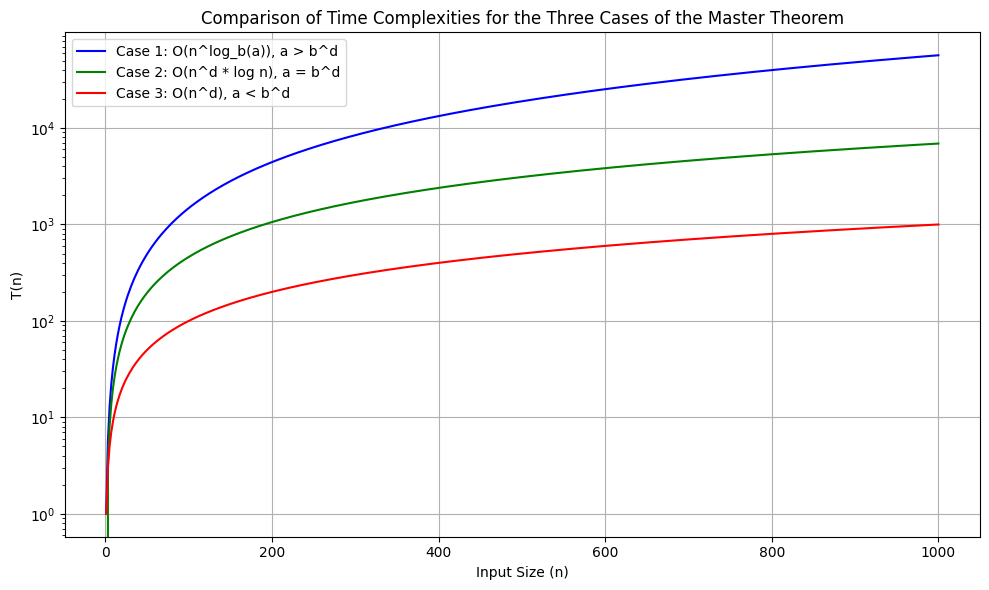

In [34]:
import matplotlib.pyplot as plt
import numpy as np

# Master Theorem function to calculate the time complexity behavior
def master_theorem_case1(n, a, b, d):
    return n**(np.log(a) / np.log(b))  # O(n^log_b(a))

def master_theorem_case2(n, a, b, d):
    return n**d * np.log(n)  # O(n^d * log n)

def master_theorem_case3(n, a, b, d):
    return n**d  # O(n^d)

# Range of input sizes
n_values = np.linspace(1, 1000, 500)

# Parameters for the three cases (a, b, d)
case1_params = (3, 2, 1)  # a > b^d, T(n) = O(n^log_b(a))
case2_params = (2, 2, 1)  # a = b^d, T(n) = O(n^d * log n)
case3_params = (1, 2, 1)  # a < b^d, T(n) = O(n^d)

# Calculate the time complexities for each case
case1_complexity = master_theorem_case1(n_values, *case1_params)
case2_complexity = master_theorem_case2(n_values, *case2_params)
case3_complexity = master_theorem_case3(n_values, *case3_params)

# Plotting the results on the same axes for direct comparison
plt.figure(figsize=(10, 6))

# Plot all cases on the same graph for comparison
plt.plot(n_values, case1_complexity, label='Case 1: O(n^log_b(a)), a > b^d', color='blue')
plt.plot(n_values, case2_complexity, label='Case 2: O(n^d * log n), a = b^d', color='green')
plt.plot(n_values, case3_complexity, label='Case 3: O(n^d), a < b^d', color='red')

# Titles and labels
plt.title('Comparison of Time Complexities for the Three Cases of the Master Theorem')
plt.xlabel('Input Size (n)')
plt.ylabel('T(n)')
plt.legend()

# Set a logarithmic scale on the y-axis for better visibility of all functions
plt.yscale('log')

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()



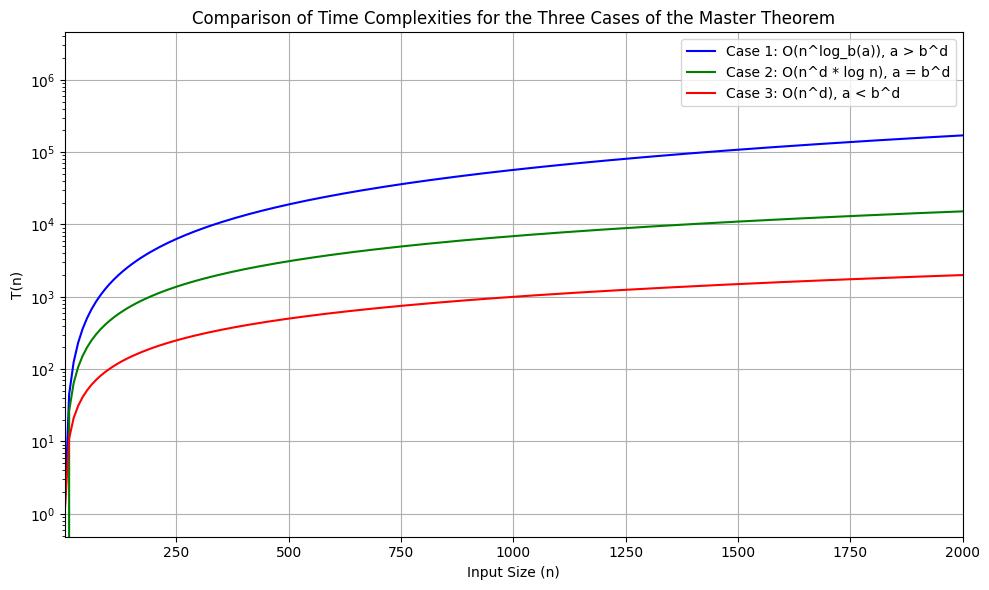

In [3]:
"""
1.	Case 1 (Recursive work dominates: a > b^d):
•	Narration: “If the work done by the recursive calls dominates, we get the solution T(n) = O(n^{\log_b(a)}).”
•	Visual: Plot the growth rates of a and b^d, showing how a > b^d, leading to the dominance of the recursive part.
2.	Case 2 (Balanced: a = b^d):
•	Narration: “If the work done outside the recursion and inside are balanced, we get T(n) = O(n^d \log n).”
•	Visual: Plot the balanced growth of recursive and non-recursive work, adding a logarithmic factor to the complexity.
3.	Case 3 (Outside work dominates: a < b^d):
•	Narration: “If the work done outside the recursive calls dominates, we get T(n) = O(n^d).”
•	Visual: Show how the combine work grows faster, resulting in O(n^d) complexity.
"""

import matplotlib.pyplot as plt
import numpy as np

# Master Theorem function to calculate the time complexity behavior
def master_theorem_case1(n, a, b, d):
    return n**(np.log(a) / np.log(b))  # O(n^log_b(a))

def master_theorem_case2(n, a, b, d):
    return n**d * np.log(n)  # O(n^d * log n)

def master_theorem_case3(n, a, b, d):
    return n**d  # O(n^d)

# Range of input sizes - Extended the range to 10000 for a longer X-axis
n_values = np.linspace(1, 10000, 1000)

# Parameters for the three cases (a, b, d)
case1_params = (3, 2, 1)  # a > b^d, T(n) = O(n^log_b(a))
case2_params = (2, 2, 1)  # a = b^d, T(n) = O(n^d * log n)
case3_params = (1, 2, 1)  # a < b^d, T(n) = O(n^d)

# Calculate the time complexities for each case
case1_complexity = master_theorem_case1(n_values, *case1_params)
case2_complexity = master_theorem_case2(n_values, *case2_params)
case3_complexity = master_theorem_case3(n_values, *case3_params)

# Plotting the results on the same axes for direct comparison
plt.figure(figsize=(10, 6))

# Plot all cases on the same graph for comparison
plt.plot(n_values, case1_complexity, label='Case 1: O(n^log_b(a)), a > b^d', color='blue')
plt.plot(n_values, case2_complexity, label='Case 2: O(n^d * log n), a = b^d', color='green')
plt.plot(n_values, case3_complexity, label='Case 3: O(n^d), a < b^d', color='red')

# Titles and labels
plt.title('Comparison of Time Complexities for the Three Cases of the Master Theorem')
plt.xlabel('Input Size (n)')
plt.ylabel('T(n)')
plt.legend()

# Set a logarithmic scale on the y-axis for better visibility of all functions
plt.yscale('log')

# Set the X-axis limit to zoom in on lower input sizes
plt.xlim([1, 2000])

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()

Case 1: a > b^d
Narration: “If the work done by the recursive calls dominates, we get the solution T(n) = O(n^log_b(a)).”


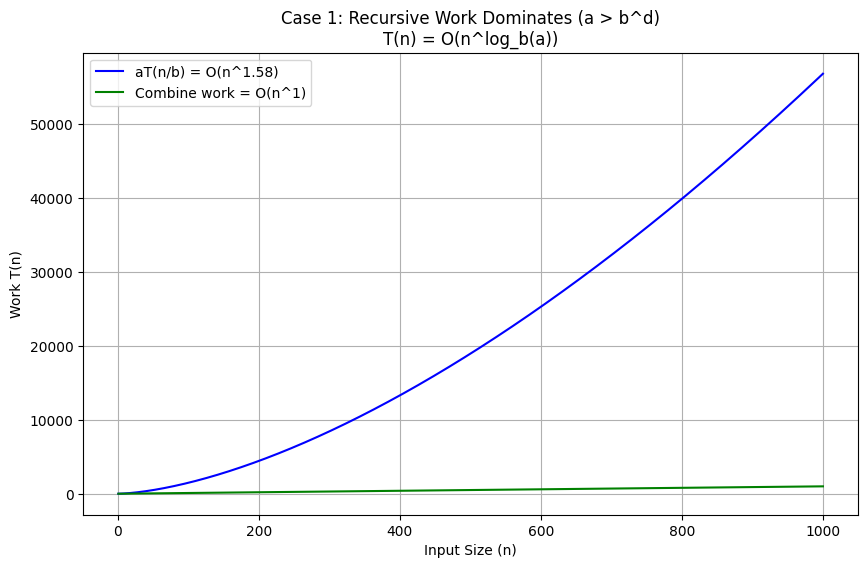


Case 2: a = b^d
Narration: “If the work done outside the recursion and inside are balanced, we get T(n) = O(n^d \log n).”


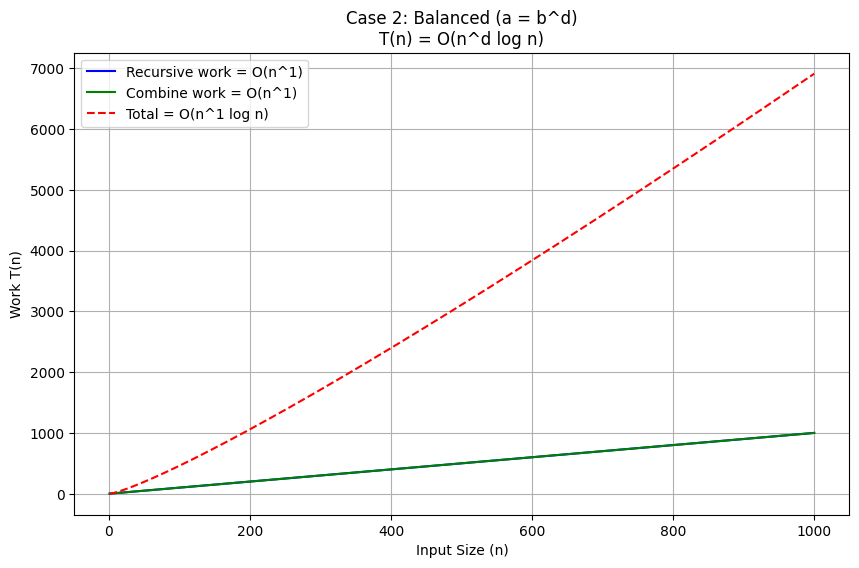


Case 3: a < b^d
Narration: “If the work done outside the recursive calls dominates, we get T(n) = O(n^d).”


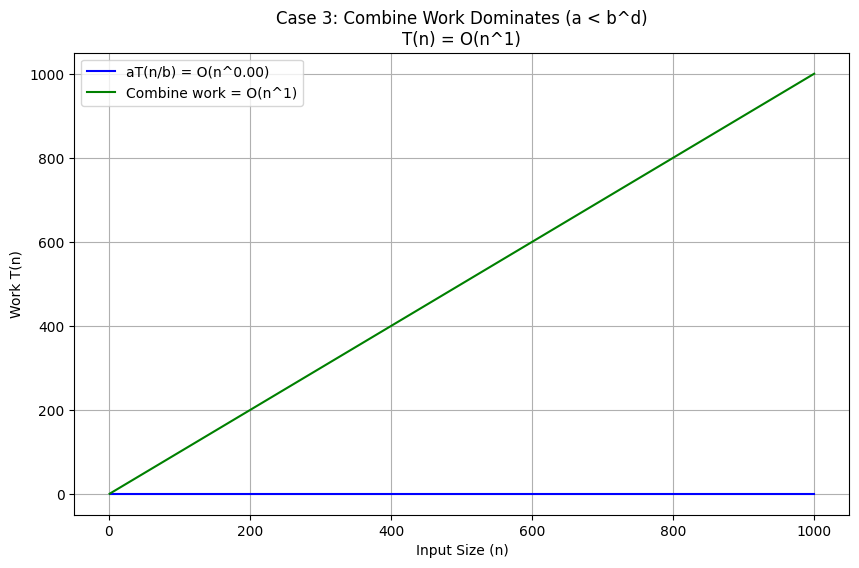

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Function to visualize Case 1: a > b^d (Recursive work dominates)
def case1(a, b, d):
    n = np.linspace(1, 1000, 1000)
    recursive_work = n ** (np.log(a) / np.log(b))  # n^log_b(a)
    outside_work = n ** d  # n^d

    plt.figure(figsize=(10, 6))
    plt.plot(n, recursive_work, label=f'aT(n/b) = O(n^{np.log(a)/np.log(b):.2f})', color='blue')
    plt.plot(n, outside_work, label=f'Combine work = O(n^{d})', color='green')
    plt.title(f'Case 1: Recursive Work Dominates (a > b^d)\nT(n) = O(n^log_b(a))')
    plt.xlabel('Input Size (n)')
    plt.ylabel('Work T(n)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Function to visualize Case 2: a = b^d (Balanced)
def case2(a, b, d):
    n = np.linspace(1, 1000, 1000)
    recursive_work = n ** d  # n^d
    outside_work = n ** d  # n^d
    total_work = n ** d * np.log(n)  # n^d * log n

    plt.figure(figsize=(10, 6))
    plt.plot(n, recursive_work, label=f'Recursive work = O(n^{d})', color='blue')
    plt.plot(n, outside_work, label=f'Combine work = O(n^{d})', color='green')
    plt.plot(n, total_work, label=f'Total = O(n^{d} log n)', color='red', linestyle='--')
    plt.title(f'Case 2: Balanced (a = b^d)\nT(n) = O(n^d log n)')
    plt.xlabel('Input Size (n)')
    plt.ylabel('Work T(n)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Function to visualize Case 3: a < b^d (Outside work dominates)
def case3(a, b, d):
    n = np.linspace(1, 1000, 1000)
    recursive_work = n ** (np.log(a) / np.log(b))  # n^log_b(a)
    outside_work = n ** d  # n^d

    plt.figure(figsize=(10, 6))
    plt.plot(n, recursive_work, label=f'aT(n/b) = O(n^{np.log(a)/np.log(b):.2f})', color='blue')
    plt.plot(n, outside_work, label=f'Combine work = O(n^{d})', color='green')
    plt.title(f'Case 3: Combine Work Dominates (a < b^d)\nT(n) = O(n^{d})')
    plt.xlabel('Input Size (n)')
    plt.ylabel('Work T(n)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Main function to execute all cases and show visualizations
def master_theorem_visualization():
    # Parameters for the three cases
    a1, b1, d1 = 3, 2, 1  # a > b^d (Case 1)
    a2, b2, d2 = 2, 2, 1  # a = b^d (Case 2)
    a3, b3, d3 = 1, 2, 1  # a < b^d (Case 3)

    print("Case 1: a > b^d\nNarration: “If the work done by the recursive calls dominates, we get the solution T(n) = O(n^log_b(a)).”")
    case1(a1, b1, d1)

    print("\nCase 2: a = b^d\nNarration: “If the work done outside the recursion and inside are balanced, we get T(n) = O(n^d \\log n).”")
    case2(a2, b2, d2)

    print("\nCase 3: a < b^d\nNarration: “If the work done outside the recursive calls dominates, we get T(n) = O(n^d).”")
    case3(a3, b3, d3)

# Execute the visualizations
master_theorem_visualization()